<a href="https://colab.research.google.com/github/hugueds/tensorflow-course/blob/master/99_autoencoder_for_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autoencoder for Images

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train = X_train / 255
X_test = X_test / 255

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [27]:
28*28

784

In [8]:
784/2/2/2/2/2


24.5

In [0]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(392, activation='relu'))
encoder.add(Dense(196, activation='relu'))
encoder.add(Dense(98, activation='relu'))
encoder.add(Dense(49, activation='relu'))
encoder.add(Dense(24, activation='relu'))

In [0]:
decoder = Sequential()
decoder.add(Dense(49, activation='relu', input_shape=[24]))
decoder.add(Dense(98, activation='relu'))
decoder.add(Dense(196, activation='relu'))
decoder.add(Dense(392, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [0]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=1.5), metrics=['acc'])

In [20]:
autoencoder.fit(X_train, X_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 341us/sample - loss: 0.2150 - acc: 0.7960
Epoch 2/5
60000/60000 [==============================] - 20s 336us/sample - loss: 0.1645 - acc: 0.8012
Epoch 3/5
60000/60000 [==============================] - 20s 340us/sample - loss: 0.1509 - acc: 0.8036
Epoch 4/5
60000/60000 [==============================] - 20s 341us/sample - loss: 0.1405 - acc: 0.8059
Epoch 5/5
60000/60000 [==============================] - 20s 338us/sample - loss: 0.1343 - acc: 0.8071


In [0]:
images = autoencoder.predict(X_test[:20])

Original


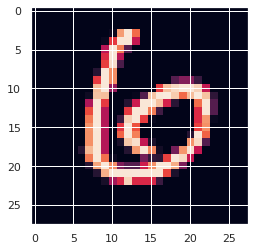

Recontr


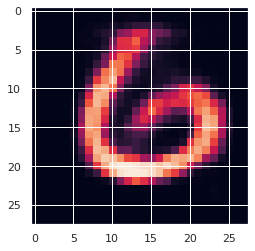

In [41]:
n = 11
print('Original')
plt.imshow(X_test[n])
plt.show()
print('Recontr')
plt.imshow(images[n])
plt.show()

